# Homework 4

#### Instructions:
- Please read these instructions as well as the questions carefully.
- Your best resource is likely the official documentation of the datascience package: http://data8.org/datascience.
- Feel free to use Excel to play with the data.
- Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell. Each time you start Jupyter Notebook, you will need to execute this cell.
- Please be sure not to re-assign variables throughout the notebook. For example, if you use `max_price` in your answer to one question, do not re-assign it later on.
- Please be sure not to re-define functions throughout the notebook. For example, if a question asks you to define `sharpe_ratio()`, the notebook that you submit should contain only one definition of that function.

In [3]:
# don't change this cell; just run it
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## A. Differences between Stocks

#### Question 1
Suppose you're analyzing the stock market and you'd like to *quantify* how *dissimilar* any two stocks are. You have monthly returns of the stocks.

You decide that the dissimilarity between two stocks is the *total* of the differences in their returns. That is, the dissimilarity is:

* the **sum** of
* the absolute values of
* the differences in their returns.

In the next cell, we've loaded arrays containing the returns for Apple and Amazon. Compute the dissimilarity (according to the above technique) between them. Call your answer `dissimilarity`. Use a single line of code to compute the answer.

In [4]:
# aapl has been around longer than amzn, so we need to focus on a common set of months by using join()
the_four = Table.read_table('https://www.dropbox.com/s/fbfrt3ot9k3vrqc/the_four.csv?raw=1')
aapl = the_four.where('ticker', 'AAPL').drop(['year', 'ticker', 'prc']).relabeled('rtn', 'rtn_aapl')
amzn = the_four.where('ticker', 'AMZN').drop(['year', 'ticker', 'prc']).relabeled('rtn', 'rtn_amzn')
combo = aapl.join('date', amzn, 'date')

# create arrays so that you can calculate dissimilarity using a single line of code
aapl_array = combo.column('rtn_aapl')
amzn_array = combo.column('rtn_amzn')

dissimilarity = sum(abs(aapl_array - amzn_array))
dissimilarity

32.17340500000001

#### Question 2
Why do we sum up the absolute values of the differences in returns, rather than just summing up the differences?

Because there might be negative value, which might decrease the differences in returns. Therefore, we need to use absolute values to get the exact differences.

##### Weighing the months
After computing dissimilarities between several stocks, you notice a problem with your method: the scale of the returns matters a lot. The scale of the stock returns is large (small) when the scale of market return is large (small).

One way to fix this problem is to assign different "weights" to different months. Here's a revised method:

1. For each month, subtract the two stocks' returns.
2. Then take the absolute value of that difference.
3. Now multiply that absolute value by a month-specific number that we call the weight.
4. Now, sum the resulting numbers.

#### Question 3
You're given a weight for each month. These are loaded into an array called `weights` in the cell below. `weights.item(0)` is the weight for the first month, `weights.item(1)` is the weight for the second month, and so on. Use the revised method to compute a revised dissimilarity between Apple and Amazon.

*Hint:* Using array arithmetic, your answer should be almost as short as in question 1.

In [ ]:
# make sure you don't modify combo created above
combo.show()

In [5]:
# compute weights
ff = Table.read_table('https://www.dropbox.com/s/qtgk1urdf78tite/F-F_Research_Data_5_Factors_2x3.CSV?raw=1')
combo2 = combo.join('date',ff,'Date')
weights = 1 / abs(combo2.column('Mkt-RF'))
weights = weights / sum(weights) # this step is called rescaling

revised_dissimilarity = sum((abs(aapl_array - amzn_array))*weights)
revised_dissimilarity

0.09052179752924824

#### Question 4
Are the weights given to you in the previous code cell higher or lower for more volatile months?

In [6]:
# uncomment one of the following two lines
# higher_or_lower = "higher"
higher_or_lower = 'lower'
higher_or_lower

'lower'

## B. Unemployment

The Federal Reserve Bank of St. Louis publishes data about jobs in the US. Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job. This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job. The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER. (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

#### Question 1
The data are in a CSV file called `unemployment.csv` and the URL is given to you below. Load that file into a table called `unemployment`.

In [7]:
file_url = 'https://www.dropbox.com/s/4kqywhr34f04gpx/unemployment.csv?raw=1'

unemployment = Table.read_table('https://www.dropbox.com/s/4kqywhr34f04gpx/unemployment.csv?raw=1')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


#### Question 2
Sort the data in descending order by NEI, naming the sorted table `by_nei`. Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

In [124]:
by_nei = unemployment.sort('NEI',descending=True)
by_nei

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


In [12]:
by_nei_pter = unemployment.sort('NEI-PTER',descending=True)
by_nei_pter

Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


#### Question 3
Use `take` to make a table containing the data for the 10 quarters when NEI was greatest. Call that table `greatest_nei`.

In [11]:
greatest_nei = by_nei.take[np.arange(0,10)]
greatest_nei

NameError: name 'by_nei' is not defined

#### Question 4
It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009. NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER. Compute an array containing the percentage of people who were PTER in each quarter. (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

In [38]:
pter = unemployment.column('NEI-PTER')-unemployment.column('NEI')
pter

array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

#### Question 5
Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order. Call the table `by_pter`.

Try to do this with a single line of code, if you can.

In [56]:
by_pter = unemployment.with_columns('PTER',pter).sort('PTER',descending=True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


#### Question 6
Add the `year` array and the `pter` array to the `unemployment` table; label these columns "Year" and "PTER", respectively. The code to create a line plot of the PTER over time is provided for you.

**Note:** If you're failing the test, but your plot looks correct, make sure that in your `unemployment` table, the "Year" column comes before the "PTER" column.

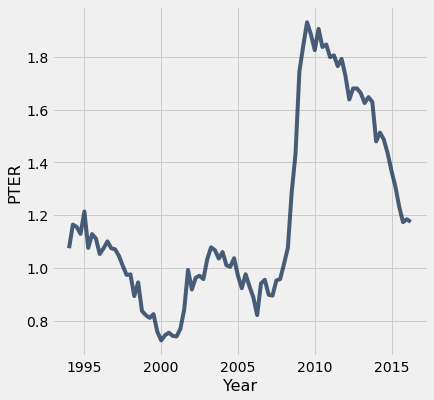

In [57]:
year = 1994 + np.arange(by_pter.num_rows)/4
unemployment = unemployment.with_columns('Year',year,'PTER',pter)
unemployment.select('Year', 'PTER').plot('Year')

#### Question 7
Were PTER rates high during or directly after the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't.

In [58]:
highPTER = True
highPTER

True

## Submission
Once you're finished, select "Save and Checkpoint" in the File menu. Pay attention to the name of your notebook---it's to the right of the "jupyter" logo at the upper left-hand corner of the page. On your computer your notebook has a file extension .ipynb. Locate and submit it on Gradescope.